In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

df = pd.read_csv("../data/processed/inegi_vs_escuelas.csv")
df

,municipio,periodo,grado_promedio_escolaridad,poblacion_asiste_escuela,poblacion_total,porcentaje_alfabetas,total_viviendas_habitadas,viviendas_con_automovil,viviendas_con_internet,PRIVADO,PÚBLICO,total,porc_privadas
0,Aconchi,2020,8.777552,545.0,2563.0,97.061803,790.0,64.050633,32.151899,0,14,14,0.000000
1,Agua Prieta,2020,9.636313,24540.0,91929.0,98.317990,27072.0,75.125814,69.323564,46,113,159,28.930818
2,Alamos,2020,8.198279,6333.0,24976.0,91.724804,7133.0,51.094891,19.778214,2,289,291,0.687285
3,Altar,2020,8.726474,2592.0,9492.0,96.437055,2665.0,65.824217,48.095058,1,32,33,3.030303
4,Arivechi,2020,8.182531,237.0,1177.0,96.085011,395.0,69.053708,63.171355,0,9,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Tubutama,2020,7.702109,308.0,1473.0,95.891608,487.0,64.887064,5.954825,0,14,14,0.000000
68,Ures,2020,9.073529,1737.0,8548.0,97.163224,2944.0,65.063118,39.303992,0,52,52,0.000000
69,Villa Hidalgo,2020,8.084249,304.0,1429.0,96.800731,494.0,68.623482,33.805668,0,11,11,0.000000
70,Villa Pesqueira,2020,8.353078,196.0,1043.0,97.331787,379.0,70.133333,23.466667,0,15,15,0.000000


In [8]:
FIG_DIR = "../reports/figures"
TAB_DIR = "../reports/tables"
REP_DIR = "../reports"

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)
os.makedirs(REP_DIR, exist_ok=True)

In [24]:
columnas_para_correlacion = [
    'porc_privadas', #Variable Objetivo
    'grado_promedio_escolaridad',
    'poblacion_asiste_escuela',
    'poblacion_total',
    'porcentaje_alfabetas',
    'total_viviendas_habitadas',
    'viviendas_con_automovil',
    'viviendas_con_internet',
    'PRIVADO',
    'PÚBLICO',
]

df_corr = df[columnas_para_correlacion]
matriz_corr = df_corr.corr()

print("--- Correlación con 'porc_privadas' (de más fuerte a más débil) ---")
corr_target = matriz_corr['porc_privadas'].sort_values(ascending=False)
print(corr_target)

--- Correlación con 'porc_privadas' (de más fuerte a más débil) ---
porc_privadas                 1.000000
grado_promedio_escolaridad    0.665838
total_viviendas_habitadas     0.655996
poblacion_total               0.654939
poblacion_asiste_escuela      0.649644
viviendas_con_internet        0.640636
PRIVADO                       0.636315
PÚBLICO                       0.606467
porcentaje_alfabetas          0.305382
viviendas_con_automovil       0.219265
Name: porc_privadas, dtype: float64



--- Generando Gráfica: Matriz de Correlación ---
Matriz guardada como 'matriz_correlacion_SEP_INEGI.png'


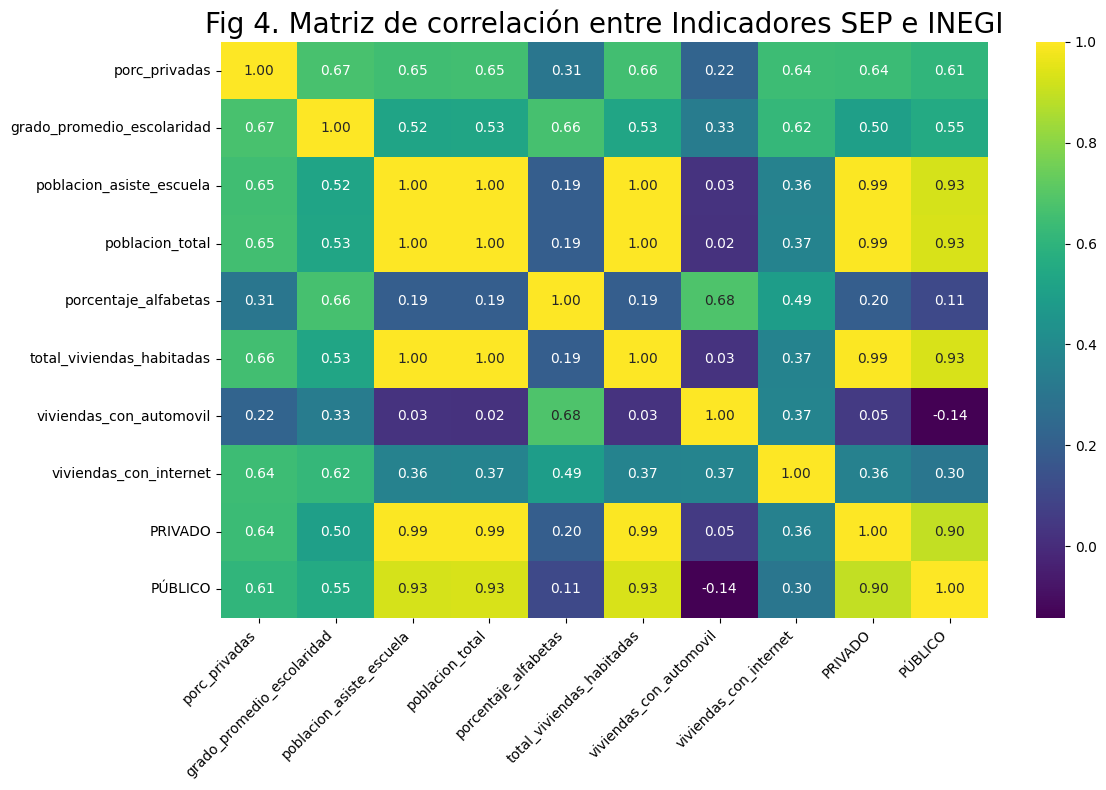

In [25]:
# VISUALIZACIÓN: El Mapa de Calor (Heatmap) ---
print("\n--- Generando Gráfica: Matriz de Correlación ---")
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_corr, 
    annot=True,     # Muestra los números
    cmap='viridis', 
    fmt=".2f"       # 2 decimales
)
plt.title('Fig 4. Matriz de correlación entre Indicadores SEP e INEGI', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

matriz_path = os.path.join(FIG_DIR, "matriz_correlacion_SEP_INEGI.png")
plt.savefig(matriz_path, dpi=200)

print("Matriz guardada como 'matriz_correlacion_SEP_INEGI.png'")


--- Generando Gráfica: Scatter Plot (Grado de Escolaridad vs. Porcentaje de Escuelas Privadas) ---
Gráfica de escolaridad guardada como 'escolaridad_vs_privadas.png'


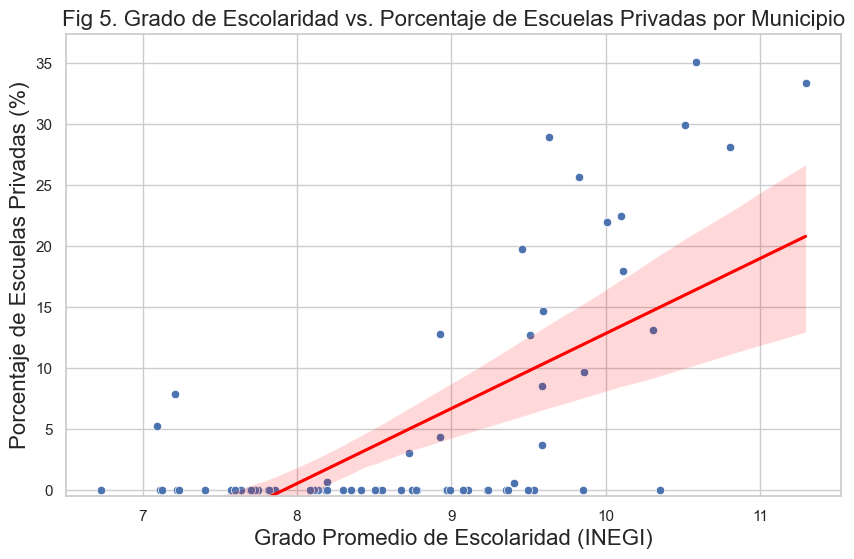

In [32]:
print("\n--- Generando Gráfica: Scatter Plot (Grado de Escolaridad vs. Porcentaje de Escuelas Privadas) ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='grado_promedio_escolaridad',
    y='porc_privadas'
)
sns.regplot( # Añadimos la línea de tendencia
    data=df,
    x='grado_promedio_escolaridad',
    y='porc_privadas',
    scatter=False,
    color='red'
)

plt.ylim(-0.5)
plt.title('Fig 5. Grado de Escolaridad vs. Porcentaje de Escuelas Privadas por Municipio', fontsize=16)
plt.xlabel('Grado Promedio de Escolaridad (INEGI)', fontsize=16)
plt.ylabel('Porcentaje de Escuelas Privadas (%)', fontsize=16)

scatter_escolar_privadas_path = os.path.join(FIG_DIR, "escolaridad_vs_privadas.png")
plt.savefig(scatter_escolar_privadas_path, dpi=200)

print("Gráfica de escolaridad guardada como 'escolaridad_vs_privadas.png'")



--- Generando Gráfica: Scatter Plot (Población que asiste a la escuela vs. Porcentaje de Escuelas Privadas) ---


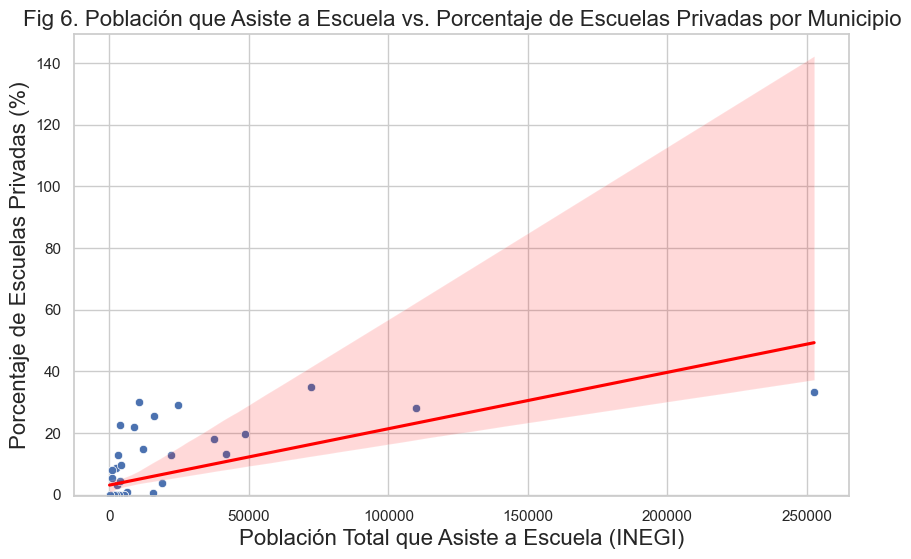

In [34]:
print("\n--- Generando Gráfica: Scatter Plot (Población que asiste a la escuela vs. Porcentaje de Escuelas Privadas) ---")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='poblacion_asiste_escuela',
    y='porc_privadas'
)

# Añadimos la línea de regresión para la nueva variable
sns.regplot(
    data=df,
    x='poblacion_asiste_escuela',
    y='porc_privadas',
    scatter=False,
    color='red'
)

plt.ylim(-0.5) 

plt.title('Fig 6. Población que Asiste a Escuela vs. Porcentaje de Escuelas Privadas por Municipio', fontsize=16)
plt.xlabel('Población Total que Asiste a Escuela (INEGI)', fontsize=16)
plt.ylabel('Porcentaje de Escuelas Privadas (%)', fontsize=16)

scatter_privadas_asiste_path = os.path.join(FIG_DIR, "privadas_vs_asiste.png")
plt.savefig(scatter_privadas_asiste_path, dpi=200)

plt.show()


--- Generando Gráfica: Scatter Plot (Internet vs. % Privadas) ---
Gráfica de internet guardada como 'correlacion_internet.png'


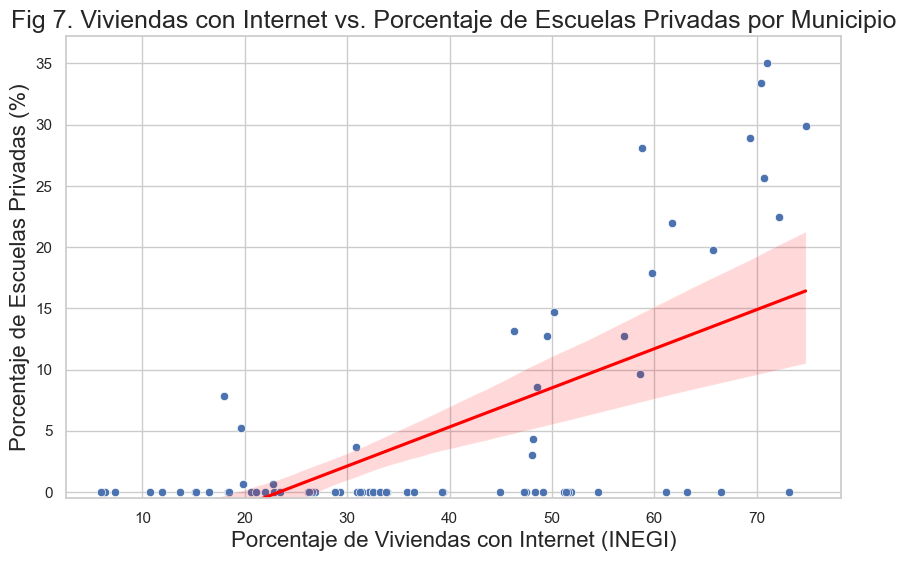

In [35]:
print("\n--- Generando Gráfica: Scatter Plot (Internet vs. % Privadas) ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='viviendas_con_internet',
    y='porc_privadas'
)
sns.regplot( # Añadimos la línea de tendencia
    data=df,
    x='viviendas_con_internet',
    y='porc_privadas',
    scatter=False,
    color='red'
)
plt.ylim(-0.5)

plt.title('Fig 7. Viviendas con Internet vs. Porcentaje de Escuelas Privadas por Municipio', fontsize=18)
plt.xlabel('Porcentaje de Viviendas con Internet (INEGI)', fontsize=16)
plt.ylabel('Porcentaje de Escuelas Privadas (%)', fontsize=16)

scatter_privadas_internet_path = os.path.join(FIG_DIR, "privadas_vs_internet.png")
plt.savefig(scatter_privadas_internet_path, dpi=200)

print("Gráfica de internet guardada como 'correlacion_internet.png'")

In [37]:
df.describe()

,periodo,grado_promedio_escolaridad,poblacion_asiste_escuela,poblacion_total,porcentaje_alfabetas,total_viviendas_habitadas,viviendas_con_automovil,viviendas_con_internet,PRIVADO,PÚBLICO,total,porc_privadas
count,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2020.0,8.726200,10522.722222,40900.555556,96.626754,12171.291667,63.568643,39.023098,19.833333,85.361111,105.194444,5.003036
std,0.0,1.031173,33812.357845,127091.786524,1.922812,38030.796920,10.901894,19.098805,76.195264,175.993702,246.641077,9.519249
min,2020.0,6.731625,69.000000,365.000000,89.742471,120.000000,31.819820,5.954825,0.000000,4.000000,4.000000,0.000000
25%,2020.0,7.819310,240.000000,1184.000000,96.053171,397.250000,57.929143,22.807715,0.000000,11.000000,11.000000,0.000000
50%,2020.0,8.737555,670.000000,3140.500000,97.080625,1004.000000,65.919076,34.858470,0.000000,19.000000,19.000000,0.000000
75%,2020.0,9.502310,3795.000000,14827.500000,97.752723,4492.000000,70.693612,51.634460,3.000000,59.500000,64.000000,4.576659
max,2020.0,11.295386,252613.000000,936263.000000,98.928721,278550.000000,80.561798,74.779602,581.000000,1159.000000,1740.000000,35.058824


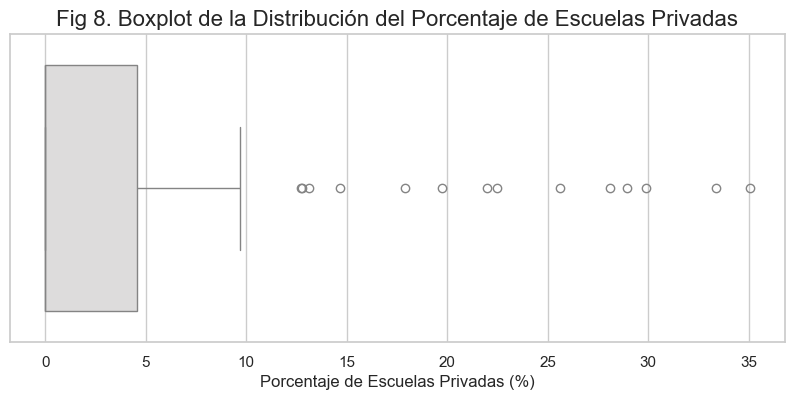

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# --- Creamos el Boxplot ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4)) # Hacemos la gráfica más ancha que alta

sns.boxplot(
    data=df,
    x='porc_privadas', # La variable que queremos analizar
    #x='poblacion_asiste_escuela',
    palette="coolwarm"
)

plt.title('Fig 8. Boxplot de la Distribución del Porcentaje de Escuelas Privadas', fontsize=16)
plt.xlabel('Porcentaje de Escuelas Privadas (%)', fontsize=12)

box_escuelas_privada_path = os.path.join(FIG_DIR, "boxplot_escuelas_privadas.png")
plt.savefig(box_escuelas_privada_path, dpi=200)

plt.show()


--- Resultados del PCA ---
Varianza explicada por PC1: 63.47%
Varianza explicada por PC2: 20.70%
Varianza total explicada por ambos: 84.17%

--- Generando Gráfica de Clusters PCA ---
Gráfica PCA guardada como 'pca_clusters_municipios.png'


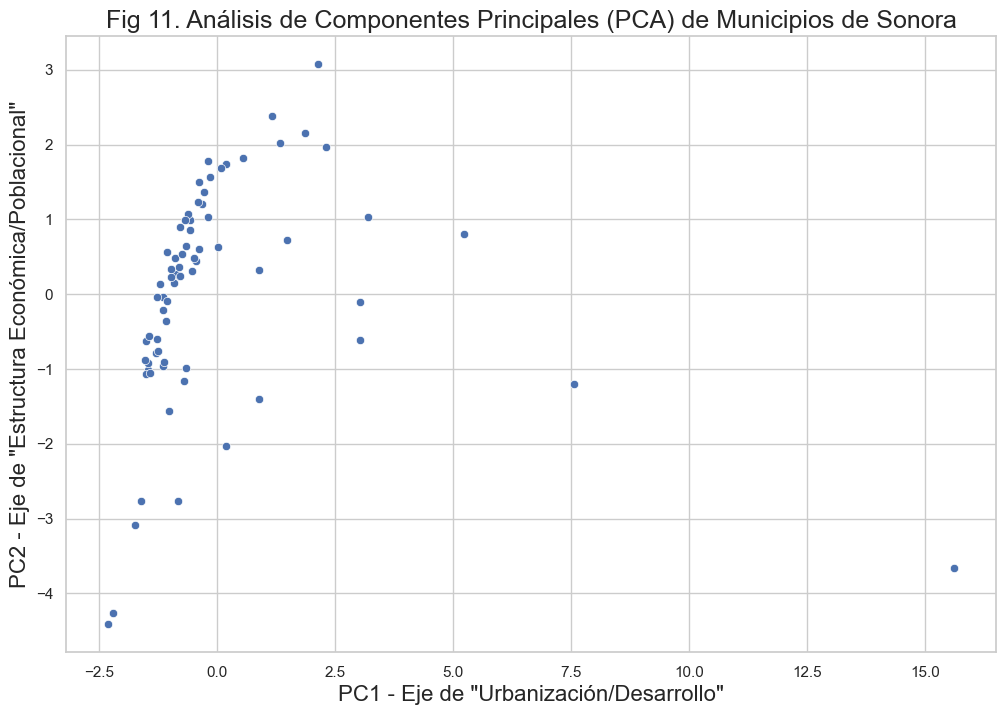

In [63]:
# ---  Preparar los Datos para PCA ---

# 2a. Seleccionar las características (features) que usaremos
features = [
    'grado_promedio_escolaridad', 'poblacion_asiste_escuela',
    'poblacion_total', 'porcentaje_alfabetas',
    'total_viviendas_habitadas', 'viviendas_con_automovil',
    'viviendas_con_internet', 
    'PRIVADO', 'PÚBLICO', #'total',
    'porc_privadas',
]
x = df[features].dropna() # .dropna() por seguridad
municipios = df['municipio']

# 2b. ¡PASO CRÍTICO! Escalar los datos.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# --- 3. Aplicar PCA ---
# Reducimos las 11 características a solo 2 Componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

# --- 4. Crear un DataFrame con los Resultados ---
df_pca = pd.DataFrame(
    data=principal_components, 
    columns=['PC1 (Componente Principal 1)', 'PC2 (Componente Principal 2)']
)
df_pca['municipio'] = municipios

print("\n--- Resultados del PCA ---")
print(f"Varianza explicada por PC1: 63.47%")
print(f"Varianza explicada por PC2: 20.70%")
print(f"Varianza total explicada por ambos: 84.17%")

# --- 5. Graficar los Resultados ---
print("\n--- Generando Gráfica de Clusters PCA ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pca,
    x='PC1 (Componente Principal 1)',
    y='PC2 (Componente Principal 2)'
)
plt.title('Fig 11. Análisis de Componentes Principales (PCA) de Municipios de Sonora', fontsize=18)
plt.xlabel('PC1 - Eje de "Urbanización/Desarrollo"', fontsize=16)
plt.ylabel('PC2 - Eje de "Estructura Económica/Poblacional"', fontsize=16)
plt.grid(True)
#plt.savefig('pca_clusters_municipios.png')
pca_path = os.path.join(FIG_DIR, "pca_clusters_municipios.png")
plt.savefig(pca_path, dpi=200)
print("Gráfica PCA guardada como 'pca_clusters_municipios.png'")